## पाककृती वर्गीकरण 1

या धड्यात, आपण विविध वर्गीकरण करणारे मॉडेल्स *घटकांच्या गटावर आधारित दिलेली राष्ट्रीय पाककृती ओळखण्यासाठी* कशी वापरता येतील याचा अभ्यास करू. तसेच, वर्गीकरण कार्यांसाठी अल्गोरिदम कसे उपयुक्त ठरू शकतात याबद्दल अधिक जाणून घेऊ.

### [**पूर्व-व्याख्यान प्रश्नमंजुषा**](https://gray-sand-07a10f403.1.azurestaticapps.net/quiz/21/)

### **तयारी**

हा धडा आपल्या [मागील धड्याच्या](https://github.com/microsoft/ML-For-Beginners/blob/main/4-Classification/1-Introduction/solution/lesson_10-R.ipynb) आधारे तयार करण्यात आला आहे, जिथे आपण:

-   आशिया आणि भारतातील सर्व अप्रतिम पाककृतींविषयी डेटासेट वापरून वर्गीकरणाची सौम्य ओळख करून दिली 😋.

-   [dplyr verbs](https://dplyr.tidyverse.org/) वापरून आपला डेटा तयार आणि स्वच्छ करण्याचे तंत्र शिकले.

-   ggplot2 वापरून सुंदर व्हिज्युअलायझेशन्स तयार केली.

-   असंतुलित डेटाशी कसे व्यवहार करायचे हे [recipes](https://recipes.tidymodels.org/articles/Simple_Example.html) वापरून पूर्व-प्रक्रिया करून दाखवले.

-   आपली `prep` आणि `bake` प्रक्रिया कशी योग्य प्रकारे कार्य करेल याची खात्री करून घेतली.

#### **पूर्वअट**

या धड्यासाठी, आपल्याला डेटा स्वच्छ, तयार आणि व्हिज्युअलायझेशनसाठी खालील पॅकेजेसची आवश्यकता असेल:

-   `tidyverse`: [tidyverse](https://www.tidyverse.org/) हा [R पॅकेजेसचा संग्रह](https://www.tidyverse.org/packages) आहे जो डेटा सायन्स अधिक जलद, सोपा आणि मजेदार बनवतो!

-   `tidymodels`: [tidymodels](https://www.tidymodels.org/) फ्रेमवर्क हा [पॅकेजेसचा संग्रह](https://www.tidymodels.org/packages/) आहे जो मॉडेलिंग आणि मशीन लर्निंगसाठी उपयुक्त आहे.

-   `themis`: [themis पॅकेज](https://themis.tidymodels.org/) असंतुलित डेटाशी व्यवहार करण्यासाठी अतिरिक्त रेसिपी स्टेप्स प्रदान करते.

-   `nnet`: [nnet पॅकेज](https://cran.r-project.org/web/packages/nnet/nnet.pdf) सिंगल हिडन लेयरसह फीड-फॉरवर्ड न्यूरल नेटवर्क्स आणि मल्टिनॉमियल लॉजिस्टिक रिग्रेशन मॉडेल्ससाठी फंक्शन्स प्रदान करते.

आपण हे पॅकेजेस खालीलप्रमाणे इंस्टॉल करू शकता:


`install.packages(c("tidyverse", "tidymodels", "DataExplorer", "here"))`

पर्यायीपणे, खालील स्क्रिप्ट तपासते की तुमच्याकडे हा मॉड्यूल पूर्ण करण्यासाठी आवश्यक पॅकेजेस आहेत का आणि ती पॅकेजेस नसल्यास ती तुमच्यासाठी स्थापित करते.


In [2]:
suppressWarnings(if (!require("pacman"))install.packages("pacman"))

pacman::p_load(tidyverse, tidymodels, themis, here)

Loading required package: pacman



## 1. प्रशिक्षण आणि चाचणी संचांमध्ये डेटा विभाजित करा.

आम्ही आपल्या मागील धड्यांमधील काही पायऱ्या निवडून सुरुवात करू.

### वेगवेगळ्या स्वयंपाकशैलींमध्ये गोंधळ निर्माण करणाऱ्या सर्वसामान्य घटकांना `dplyr::select()` वापरून काढून टाका.

सर्वांनाच तांदूळ, लसूण आणि आले आवडते!


In [3]:
# Load the original cuisines data
df <- read_csv(file = "https://raw.githubusercontent.com/microsoft/ML-For-Beginners/main/4-Classification/data/cuisines.csv")

# Drop id column, rice, garlic and ginger from our original data set
df_select <- df %>% 
  select(-c(1, rice, garlic, ginger)) %>%
  # Encode cuisine column as categorical
  mutate(cuisine = factor(cuisine))

# Display new data set
df_select %>% 
  slice_head(n = 5)

# Display distribution of cuisines
df_select %>% 
  count(cuisine) %>% 
  arrange(desc(n))

New names:
* `` -> ...1

Rows: 2448 Columns: 385

── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr   (1): cuisine
dbl (384): ...1, almond, angelica, anise, anise_seed, apple, apple_brandy, a...


ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.



cuisine,almond,angelica,anise,anise_seed,apple,apple_brandy,apricot,armagnac,artemisia,⋯,whiskey,white_bread,white_wine,whole_grain_wheat_flour,wine,wood,yam,yeast,yogurt,zucchini
<fct>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
indian,0,0,0,0,0,0,0,0,0,⋯,0,0,0,0,0,0,0,0,0,0
indian,1,0,0,0,0,0,0,0,0,⋯,0,0,0,0,0,0,0,0,0,0
indian,0,0,0,0,0,0,0,0,0,⋯,0,0,0,0,0,0,0,0,0,0
indian,0,0,0,0,0,0,0,0,0,⋯,0,0,0,0,0,0,0,0,0,0
indian,0,0,0,0,0,0,0,0,0,⋯,0,0,0,0,0,0,0,0,1,0


cuisine,n
<fct>,<int>
korean,799
indian,598
chinese,442
japanese,320
thai,289


परफेक्ट! आता, डेटा अशा प्रकारे विभाजित करूया की 70% डेटा प्रशिक्षणासाठी आणि 30% डेटा चाचणीसाठी जाईल. डेटा विभाजित करताना `स्तरीकरण` तंत्र लागू करू, ज्यामुळे `प्रत्येक खाद्यप्रकाराचा प्रमाण` प्रशिक्षण आणि वैधता डेटासेटमध्ये कायम राहील.

[rsample](https://rsample.tidymodels.org/), Tidymodels मधील एक पॅकेज, डेटा विभाजन आणि पुनःनमुनाकरणासाठी कार्यक्षम पायाभूत सुविधा प्रदान करते:


In [4]:
# Load the core Tidymodels packages into R session
library(tidymodels)

# Create split specification
set.seed(2056)
cuisines_split <- initial_split(data = df_select,
                                strata = cuisine,
                                prop = 0.7)

# Extract the data in each split
cuisines_train <- training(cuisines_split)
cuisines_test <- testing(cuisines_split)

# Print the number of cases in each split
cat("Training cases: ", nrow(cuisines_train), "\n",
    "Test cases: ", nrow(cuisines_test), sep = "")

# Display the first few rows of the training set
cuisines_train %>% 
  slice_head(n = 5)


# Display distribution of cuisines in the training set
cuisines_train %>% 
  count(cuisine) %>% 
  arrange(desc(n))

Training cases: 1712
Test cases: 736

cuisine,almond,angelica,anise,anise_seed,apple,apple_brandy,apricot,armagnac,artemisia,⋯,whiskey,white_bread,white_wine,whole_grain_wheat_flour,wine,wood,yam,yeast,yogurt,zucchini
<fct>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
chinese,0,0,0,0,0,0,0,0,0,⋯,0,0,0,0,1,0,0,0,0,0
chinese,0,0,0,0,0,0,0,0,0,⋯,0,0,0,0,1,0,0,0,0,0
chinese,0,0,0,0,0,0,0,0,0,⋯,0,0,0,0,0,0,0,0,0,0
chinese,0,0,0,0,0,0,0,0,0,⋯,0,0,0,0,0,0,0,0,0,0
chinese,0,0,0,0,0,0,0,0,0,⋯,0,0,0,0,0,0,0,0,0,0


cuisine,n
<fct>,<int>
korean,559
indian,418
chinese,309
japanese,224
thai,202


## 2. असमतोल डेटा हाताळा

जसे तुम्ही मूळ डेटा सेटमध्ये तसेच आमच्या प्रशिक्षण सेटमध्ये पाहिले असेल, तिथे स्वयंपाक प्रकारांच्या संख्येमध्ये खूपच असमान वितरण आहे. कोरियन स्वयंपाक प्रकार *जवळजवळ* थाई स्वयंपाक प्रकारांच्या तीन पट आहेत. असमतोल डेटा मॉडेलच्या कार्यक्षमतेवर नकारात्मक परिणाम करू शकतो. अनेक मॉडेल्स तेव्हा चांगले कार्य करतात जेव्हा निरीक्षणांची संख्या समान असते आणि त्यामुळे असमतोल डेटासह संघर्ष करतात.

असमतोल डेटा सेट्स हाताळण्यासाठी मुख्यतः दोन पद्धती आहेत:

-   अल्पसंख्याक वर्गामध्ये निरीक्षणे वाढवणे: `ओव्हर-सॅम्पलिंग` उदा. SMOTE अल्गोरिदम वापरणे, जे अल्पसंख्याक वर्गाचे नवीन उदाहरणे त्यांच्या जवळच्या शेजाऱ्यांचा वापर करून कृत्रिमरीत्या निर्माण करते.

-   बहुसंख्य वर्गामधून निरीक्षणे काढून टाकणे: `अंडर-सॅम्पलिंग`

आमच्या मागील धड्यात, आम्ही `recipe` वापरून असमतोल डेटा सेट्स कसे हाताळायचे ते दाखवले. `recipe` म्हणजे एक प्रकारचा आराखडा जो डेटा सेटवर कोणते पायऱ्या लागू करायच्या आहेत हे वर्णन करतो, जेणेकरून तो डेटा विश्लेषणासाठी तयार होईल. आमच्या बाबतीत, आम्हाला आमच्या `training set` साठी स्वयंपाक प्रकारांची समान वितरण हवी आहे. चला, सुरुवात करूया.


In [5]:
# Load themis package for dealing with imbalanced data
library(themis)

# Create a recipe for preprocessing training data
cuisines_recipe <- recipe(cuisine ~ ., data = cuisines_train) %>% 
  step_smote(cuisine)

# Print recipe
cuisines_recipe

Data Recipe

Inputs:

      role #variables
   outcome          1
 predictor        380

Operations:

SMOTE based on cuisine

आपण अर्थातच पुष्टी करू शकता (prep+bake वापरून) की ही रेसिपी तुमच्या अपेक्षेनुसार कार्य करेल - सर्व पाककृती लेबल्समध्ये `559` निरीक्षणे आहेत.

आता आपण ही रेसिपी मॉडेलिंगसाठी प्रीप्रोसेसर म्हणून वापरणार असल्याने, `workflow()` सर्व prep आणि bake आपल्यासाठी करेल, त्यामुळे आपल्याला रेसिपी मॅन्युअली अंदाज करण्याची गरज नाही.

आता आपण मॉडेल प्रशिक्षणासाठी तयार आहोत 👩‍💻👨‍💻!

## 3. तुमचा वर्गीकरणकर्ता निवडणे

<p >
   <img src="../../images/parsnip.jpg"
   width="600"/>
   <figcaption>@allison_horst यांचे कलाकृती</figcaption>


आता आपल्याला ठरवायचे आहे की या कामासाठी कोणता अल्गोरिदम वापरायचा 🤔.

Tidymodels मध्ये, [`parsnip पॅकेज`](https://parsnip.tidymodels.org/index.html) विविध इंजिन्स (पॅकेजेस) मध्ये मॉडेल्ससह काम करण्यासाठी सुसंगत इंटरफेस प्रदान करते. कृपया [मॉडेल प्रकार आणि इंजिन्स](https://www.tidymodels.org/find/parsnip/#models) आणि त्यांचे संबंधित [मॉडेल आर्ग्युमेंट्स](https://www.tidymodels.org/find/parsnip/#model-args) शोधण्यासाठी parsnip दस्तऐवज पहा. सुरुवातीला विविधता थोडी गोंधळात टाकणारी वाटू शकते. उदाहरणार्थ, खालील पद्धतींमध्ये वर्गीकरण तंत्रांचा समावेश आहे:

-   C5.0 नियम-आधारित वर्गीकरण मॉडेल्स

-   लवचिक भेदक मॉडेल्स

-   रेषीय भेदक मॉडेल्स

-   नियमित भेदक मॉडेल्स

-   लॉजिस्टिक रिग्रेशन मॉडेल्स

-   मल्टिनॉमियल रिग्रेशन मॉडेल्स

-   नाईव्ह बेयस मॉडेल्स

-   सपोर्ट व्हेक्टर मशीन

-   जवळचे शेजारी

-   निर्णय वृक्ष

-   एन्सेम्बल पद्धती

-   न्यूरल नेटवर्क्स

यादी अजूनही चालूच आहे!

### **कोणता वर्गीकरणकर्ता निवडायचा?**

तर, तुम्ही कोणता वर्गीकरणकर्ता निवडाल? अनेक पर्याय वापरून चांगला निकाल मिळतो का हे पाहणे हा एक चाचणीचा मार्ग असतो.

> AutoML हा प्रश्न सोप्या पद्धतीने सोडवतो, कारण तो क्लाउडमध्ये हे सर्व तुलनात्मक विश्लेषण चालवतो आणि तुमच्या डेटासाठी सर्वोत्तम अल्गोरिदम निवडण्याची परवानगी देतो. [येथे प्रयत्न करा](https://docs.microsoft.com/learn/modules/automate-model-selection-with-azure-automl/?WT.mc_id=academic-77952-leestott)

तसेच, वर्गीकरणकर्त्याची निवड आपल्या समस्येवर अवलंबून असते. उदाहरणार्थ, जेव्हा परिणाम `दोनांपेक्षा जास्त वर्गांमध्ये` वर्गीकृत केला जाऊ शकतो, जसे की आपल्या प्रकरणात, तेव्हा तुम्हाला `मल्टिक्लास वर्गीकरण अल्गोरिदम` वापरावा लागतो, `बायनरी वर्गीकरण`ऐवजी.

### **एक चांगला दृष्टिकोन**

अंधाधुंद अंदाज लावण्यापेक्षा चांगला मार्ग म्हणजे या डाउनलोड करण्यायोग्य [ML चीट शीट](https://docs.microsoft.com/azure/machine-learning/algorithm-cheat-sheet?WT.mc_id=academic-77952-leestott) वर दिलेल्या कल्पनांचे अनुसरण करणे. येथे, आपल्याला कळते की आपल्या मल्टिक्लास समस्येसाठी, आपल्याकडे काही पर्याय आहेत:

<p >
   <img src="../../images/cheatsheet.png"
   width="500"/>
   <figcaption>मायक्रोसॉफ्टच्या अल्गोरिदम चीट शीटचा एक भाग, ज्यामध्ये मल्टिक्लास वर्गीकरणाचे पर्याय दिले आहेत</figcaption>


### **तर्कशक्ती**

चला पाहूया की दिलेल्या अटींनुसार वेगवेगळ्या दृष्टिकोनांचा विचार करून योग्य पद्धत कशी निवडता येईल:

-   **डीप न्यूरल नेटवर्क्स खूप जड आहेत**. आपल्याकडे स्वच्छ पण मर्यादित डेटासेट आहे, आणि आपण स्थानिकरित्या नोटबुक्सद्वारे प्रशिक्षण घेत आहोत, त्यामुळे डीप न्यूरल नेटवर्क्स या कामासाठी खूपच जड ठरतील.

-   **दोन-वर्ग वर्गीकरणकर्ता नाही**. आपण दोन-वर्ग वर्गीकरणकर्ता वापरत नाही, त्यामुळे one-vs-all पद्धत नाकारली जाते.

-   **डिसिजन ट्री किंवा लॉजिस्टिक रिग्रेशन उपयुक्त ठरू शकते**. डिसिजन ट्री उपयुक्त ठरू शकते, किंवा मल्टिनॉमियल रिग्रेशन/मल्टिक्लास लॉजिस्टिक रिग्रेशन मल्टिक्लास डेटासाठी उपयुक्त ठरू शकते.

-   **मल्टिक्लास बूस्टेड डिसिजन ट्री वेगळ्या समस्येचे निराकरण करतो**. मल्टिक्लास बूस्टेड डिसिजन ट्री मुख्यतः नॉनपॅरामेट्रिक कामांसाठी उपयुक्त आहे, जसे की रँकिंग तयार करणे, त्यामुळे तो आपल्यासाठी उपयुक्त नाही.

सामान्यतः, अधिक जटिल मशीन लर्निंग मॉडेल्स (जसे की एन्सेंबल पद्धती) वापरण्यापूर्वी, शक्य तितके साधे मॉडेल तयार करणे चांगले असते, जेणेकरून आपल्याला डेटामध्ये काय चालले आहे याची कल्पना येईल. त्यामुळे या धड्यासाठी, आपण `मल्टिनॉमियल रिग्रेशन` मॉडेलपासून सुरुवात करू.

> लॉजिस्टिक रिग्रेशन ही एक तंत्र आहे जी परिणामात्मक व्हेरिएबल श्रेणीबद्ध (किंवा नाममात्र) असताना वापरली जाते. बायनरी लॉजिस्टिक रिग्रेशनमध्ये परिणाम व्हेरिएबल्सची संख्या दोन असते, तर मल्टिनॉमियल लॉजिस्टिक रिग्रेशनमध्ये परिणाम व्हेरिएबल्सची संख्या दोनपेक्षा जास्त असते. अधिक वाचनासाठी [Advanced Regression Methods](https://bookdown.org/chua/ber642_advanced_regression/multinomial-logistic-regression.html) पहा.

## 4. मल्टिनॉमियल लॉजिस्टिक रिग्रेशन मॉडेल प्रशिक्षण आणि मूल्यांकन करा.

Tidymodels मध्ये, `parsnip::multinom_reg()` हे मॉडेल मल्टिनॉमियल वितरणाचा वापर करून मल्टिक्लास डेटाचे भाकीत करण्यासाठी रेषीय प्रेडिक्टर्स वापरते. हे मॉडेल फिट करण्यासाठी तुम्ही कोणत्या पद्धती/इंजिन्स वापरू शकता यासाठी `?multinom_reg()` पहा.

या उदाहरणासाठी, आपण [nnet](https://cran.r-project.org/web/packages/nnet/nnet.pdf) इंजिनद्वारे मल्टिनॉमियल रिग्रेशन मॉडेल फिट करू.

> मी `penalty` साठी एक मूल्य थोडेसे अंदाजाने निवडले आहे. हे मूल्य निवडण्यासाठी चांगल्या पद्धती आहेत, जसे की `resampling` आणि मॉडेलचे `tuning` करणे, ज्याबद्दल आपण नंतर चर्चा करू.
>
> मॉडेल हायपरपॅरामिटर्स ट्यून करण्याबद्दल अधिक जाणून घ्यायचे असल्यास [Tidymodels: Get Started](https://www.tidymodels.org/start/tuning/) पहा.


In [6]:
# Create a multinomial regression model specification
mr_spec <- multinom_reg(penalty = 1) %>% 
  set_engine("nnet", MaxNWts = 2086) %>% 
  set_mode("classification")

# Print model specification
mr_spec

Multinomial Regression Model Specification (classification)

Main Arguments:
  penalty = 1

Engine-Specific Arguments:
  MaxNWts = 2086

Computational engine: nnet 


छान काम केले 🥳! आता आपल्याकडे एक रेसिपी आणि एक मॉडेल स्पेसिफिकेशन आहे, त्यामुळे आपल्याला त्यांना एकत्र बांधून एक असे ऑब्जेक्ट तयार करायचे आहे जे प्रथम डेटा पूर्व-प्रक्रिया करेल, नंतर पूर्व-प्रक्रिया केलेल्या डेटावर मॉडेल फिट करेल आणि संभाव्य पोस्ट-प्रोसेसिंग क्रियाकलापांसाठीही परवानगी देईल. Tidymodels मध्ये, हा सोयीस्कर ऑब्जेक्ट [`workflow`](https://workflows.tidymodels.org/) म्हणून ओळखला जातो आणि तुमच्या मॉडेलिंग घटकांना सोयीस्करपणे सामावून घेतो! यालाच आपण *Python* मध्ये *pipelines* म्हणतो.

तर चला, सगळं एकत्र करून एक workflow तयार करूया!📦


In [7]:
# Bundle recipe and model specification
mr_wf <- workflow() %>% 
  add_recipe(cuisines_recipe) %>% 
  add_model(mr_spec)

# Print out workflow
mr_wf

══ Workflow ════════════════════════════════════════════════════════════════════
Preprocessor: Recipe
Model: multinom_reg()

── Preprocessor ────────────────────────────────────────────────────────────────
1 Recipe Step

• step_smote()

── Model ───────────────────────────────────────────────────────────────────────
Multinomial Regression Model Specification (classification)

Main Arguments:
  penalty = 1

Engine-Specific Arguments:
  MaxNWts = 2086

Computational engine: nnet 


वर्कफ्लो 👌👌! **`workflow()`** मॉडेलप्रमाणेच फिट केला जाऊ शकतो. तर, मॉडेल प्रशिक्षण देण्याची वेळ आली आहे!


In [8]:
# Train a multinomial regression model
mr_fit <- fit(object = mr_wf, data = cuisines_train)

mr_fit

══ Workflow [trained] ══════════════════════════════════════════════════════════
Preprocessor: Recipe
Model: multinom_reg()

── Preprocessor ────────────────────────────────────────────────────────────────
1 Recipe Step

• step_smote()

── Model ───────────────────────────────────────────────────────────────────────
Call:
nnet::multinom(formula = ..y ~ ., data = data, decay = ~1, MaxNWts = ~2086, 
    trace = FALSE)

Coefficients:
         (Intercept)     almond angelica         anise anise_seed       apple
indian    0.19723325  0.2409661        0 -5.004955e-05 -0.1657635 -0.05769734
japanese  0.13961959 -0.6262400        0 -1.169155e-04 -0.4893596 -0.08585717
korean    0.22377347 -0.1833485        0 -5.560395e-05 -0.2489401 -0.15657804
thai     -0.04336577 -0.6106258        0  4.903828e-04 -0.5782866  0.63451105
         apple_brandy     apricot armagnac   artemisia artichoke   asparagus
indian              0  0.37042636        0 -0.09122797         0 -0.27181970
japanese            0

मॉडेलने प्रशिक्षणादरम्यान शिकलेल्या गुणांकांचे आउटपुट दाखवते.

### प्रशिक्षित मॉडेलचे मूल्यांकन करा

चाचणी संचावर मॉडेलने कसे काम केले हे मोजून पाहण्याची वेळ आली आहे 📏! चाचणी संचावर अंदाज वर्तवून सुरुवात करूया.


In [9]:
# Make predictions on the test set
results <- cuisines_test %>% select(cuisine) %>% 
  bind_cols(mr_fit %>% predict(new_data = cuisines_test))

# Print out results
results %>% 
  slice_head(n = 5)

cuisine,.pred_class
<fct>,<fct>
indian,thai
indian,indian
indian,indian
indian,indian
indian,indian


छान काम! टायडीमॉडेल्समध्ये, मॉडेलच्या कार्यक्षमतेचे मूल्यांकन [यार्डस्टिक](https://yardstick.tidymodels.org/) चा वापर करून केले जाऊ शकते - कार्यक्षमतेचे मेट्रिक्स वापरून मॉडेल्सची परिणामकारकता मोजण्यासाठी वापरले जाणारे एक पॅकेज. जसे आपण आपल्या लॉजिस्टिक रिग्रेशन धड्यात केले, तसेच सुरुवात करूया एका कन्फ्युजन मॅट्रिक्सची गणना करून.


In [10]:
# Confusion matrix for categorical data
conf_mat(data = results, truth = cuisine, estimate = .pred_class)


          Truth
Prediction chinese indian japanese korean thai
  chinese       83      1        8     15   10
  indian         4    163        1      2    6
  japanese      21      5       73     25    1
  korean        15      0       11    191    0
  thai          10     11        3      7   70

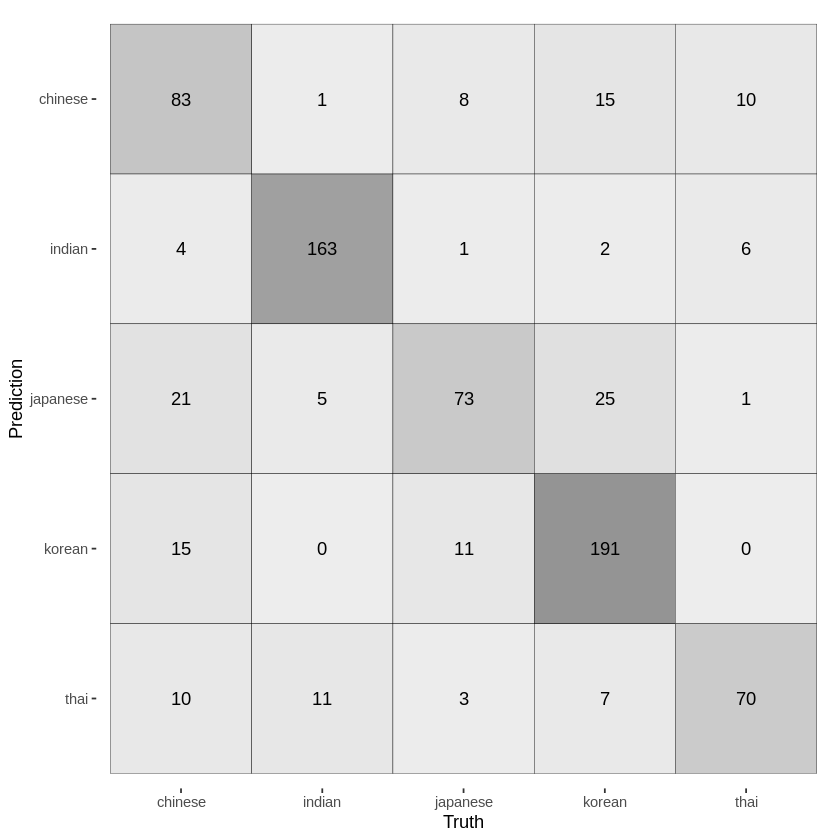

In [11]:
update_geom_defaults(geom = "tile", new = list(color = "black", alpha = 0.7))
# Visualize confusion matrix
results %>% 
  conf_mat(cuisine, .pred_class) %>% 
  autoplot(type = "heatmap")

गोंधळ मॅट्रिक्स प्लॉटमधील गडद चौकोन उच्च संख्येने प्रकरणे दर्शवतात, आणि तुम्हाला शक्यतो गडद चौकोनांची तिरपी रेषा दिसेल जी दर्शवते की जिथे अंदाजित आणि वास्तविक लेबल समान आहेत.

आता गोंधळ मॅट्रिक्ससाठी सारांश आकडेवारीची गणना करूया.


In [12]:
# Summary stats for confusion matrix
conf_mat(data = results, truth = cuisine, estimate = .pred_class) %>% 
summary()

.metric,.estimator,.estimate
<chr>,<chr>,<dbl>
accuracy,multiclass,0.7880435
kap,multiclass,0.7276583
sens,macro,0.7780927
spec,macro,0.9477598
ppv,macro,0.7585583
npv,macro,0.9460080
mcc,multiclass,0.7292724
j_index,macro,0.7258524
bal_accuracy,macro,0.8629262


जर आपण अचूकता, संवेदनशीलता, ppv यासारख्या काही मेट्रिक्सवर लक्ष केंद्रित केले, तर सुरुवातीसाठी आपण फारसे वाईट नाही आहोत 🥳!

## 4. अधिक सखोल विचार

चला एक सूक्ष्म प्रश्न विचारू: दिलेल्या प्रकारच्या खाद्यपदार्थाला अंदाजित परिणाम म्हणून स्वीकारण्यासाठी कोणती निकष वापरली जातात?

तर, सांख्यिकीय मशीन लर्निंग अल्गोरिदम, जसे की लॉजिस्टिक रिग्रेशन, हे `प्रायिकता`वर आधारित असतात; त्यामुळे वर्गीकरण करणाऱ्या मॉडेलने प्रत्यक्षात जे अंदाजित केले जाते ते म्हणजे संभाव्य परिणामांच्या संचावर आधारित प्रायिकता वितरण. ज्या वर्गाची प्रायिकता सर्वाधिक असते, तो वर्ग दिलेल्या निरीक्षणांसाठी सर्वात संभाव्य परिणाम म्हणून निवडला जातो.

चला हे कृतीत पाहू, जिथे आपण कठोर वर्ग अंदाज आणि प्रायिकता दोन्ही तयार करू.


In [13]:
# Make hard class prediction and probabilities
results_prob <- cuisines_test %>%
  select(cuisine) %>% 
  bind_cols(mr_fit %>% predict(new_data = cuisines_test)) %>% 
  bind_cols(mr_fit %>% predict(new_data = cuisines_test, type = "prob"))

# Print out results
results_prob %>% 
  slice_head(n = 5)

cuisine,.pred_class,.pred_chinese,.pred_indian,.pred_japanese,.pred_korean,.pred_thai
<fct>,<fct>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
indian,thai,1.551259e-03,0.4587877,5.988039e-04,2.428503e-04,5.388194e-01
indian,indian,2.637133e-05,0.9999488,6.648651e-07,2.259993e-05,1.577948e-06
indian,indian,1.049433e-03,0.9909982,1.060937e-03,1.644947e-05,6.874989e-03
indian,indian,6.237482e-02,0.4763035,9.136702e-02,3.660913e-01,3.863391e-03
indian,indian,1.431745e-02,0.9418551,2.945239e-02,8.721782e-03,5.653283e-03


खूप छान!

✅ तुम्ही स्पष्ट करू शकता का की मॉडेलला पहिली निरीक्षण थाई असल्याचा विश्वास का आहे?

## **🚀चॅलेंज**

या धड्यात, तुम्ही तुमचा स्वच्छ डेटा वापरून एक मशीन लर्निंग मॉडेल तयार केले जे घटकांच्या मालिकेवर आधारित राष्ट्रीय खाद्यपदार्थाचा अंदाज लावू शकते. Tidymodels डेटा वर्गीकृत करण्यासाठी प्रदान करत असलेल्या [अनेक पर्यायां](https://www.tidymodels.org/find/parsnip/#models) आणि बहुपदीय प्रतिगमन फिट करण्याच्या [इतर पद्धतीं](https://parsnip.tidymodels.org/articles/articles/Examples.html#multinom_reg-models) वाचण्यासाठी थोडा वेळ घ्या.

#### धन्यवाद:

[`Allison Horst`](https://twitter.com/allison_horst/) यांना R अधिक स्वागतार्ह आणि आकर्षक बनवणाऱ्या अप्रतिम चित्रण तयार केल्याबद्दल. तिच्या [गॅलरी](https://www.google.com/url?q=https://github.com/allisonhorst/stats-illustrations&sa=D&source=editors&ust=1626380772530000&usg=AOvVaw3zcfyCizFQZpkSLzxiiQEM) मध्ये अधिक चित्रण शोधा.

[Cassie Breviu](https://www.twitter.com/cassieview) आणि [Jen Looper](https://www.twitter.com/jenlooper) यांना या मॉड्यूलची मूळ Python आवृत्ती तयार केल्याबद्दल ♥️

<br>
मी काही विनोद टाकले असते, पण मला खाद्यपदार्थांवरील शब्दखेळ समजत नाही 😅.

<br>

आनंदी शिक्षण,

[Eric](https://twitter.com/ericntay), गोल्ड Microsoft Learn स्टुडंट अॅम्बेसेडर.



---

**अस्वीकरण**:  
हा दस्तऐवज AI भाषांतर सेवा [Co-op Translator](https://github.com/Azure/co-op-translator) वापरून भाषांतरित करण्यात आला आहे. आम्ही अचूकतेसाठी प्रयत्नशील असलो तरी कृपया लक्षात ठेवा की स्वयंचलित भाषांतरांमध्ये त्रुटी किंवा अचूकतेचा अभाव असू शकतो. मूळ भाषेतील दस्तऐवज हा अधिकृत स्रोत मानला जावा. महत्त्वाच्या माहितीसाठी व्यावसायिक मानवी भाषांतराची शिफारस केली जाते. या भाषांतराचा वापर करून निर्माण होणाऱ्या कोणत्याही गैरसमज किंवा चुकीच्या अर्थासाठी आम्ही जबाबदार राहणार नाही.
